In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df = pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=51717, step=1)

In [6]:
df1 = df.copy()

### Dropping repeated columns
Dropping unneccessary columns. These coulmns are not required for analysis

In [7]:
df1.drop(['url','address','dish_liked','reviews_list','menu_item','phone'],axis=1,inplace=True)
df1

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


### Renaming Columns

In [9]:
df1.rename(columns={'name':'rest_name','rate':'ratings','approx_cost(for two people)':'cost-for-2','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
df1.head()

,rest_name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost-for-2,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Handling Null Values

In [10]:
df1.isnull().sum()

rest_name          0
online_order       0
book_table         0
ratings         7775
votes              0
location          21
rest_type        227
cuisines          45
cost-for-2       346
type               0
city               0
dtype: int64

In [11]:
df1 = df1.fillna('N/A')

In [12]:
df1.isnull().sum()

rest_name       0
online_order    0
book_table      0
ratings         0
votes           0
location        0
rest_type       0
cuisines        0
cost-for-2      0
type            0
city            0
dtype: int64

In [13]:
df1.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Cleaning of columns

In [14]:
for i in df1:
    print(df1[i].unique())

['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
['Yes' 'No']
['Yes' 'No']
['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5'
 'N/A' '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5'
 '2.2/5' '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5'
 '4.1 /5' '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5'
 '2.5 /5' '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5'
 '2.0/5' '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5'
 '2.4 /5' '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
[ 775  787  918 ... 4957 2382  843]
['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanaha

In [15]:
import re
a = re.compile('[Ã\x83]|[Â\x82]')
x=[]
for i in df1['rest_name']:
    x.append(a.sub("",i))
    
df1['rest_name']=x

In [16]:
df1.rest_name

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712    Best Brews - Four Points by Sheraton Bengaluru...
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: rest_name, Length: 51717, dtype: object

In [17]:
df1.ratings.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 'N/A', '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5',
       '2.3/5', '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5',
       '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5',
       '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5',
       '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5',
       '4.6 /5', '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5',
       '2.4 /5', '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
df1.drop(df1.loc[df1['ratings']=='NEW'].index, inplace=True)

In [19]:
df1.drop(df1.loc[df1['ratings']=='-'].index, inplace=True)

In [20]:
df1.ratings.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', 'N/A', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df1.ratings=df1.ratings.astype(str).apply(lambda x: x.replace("/5",""))

In [22]:
df1.ratings.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', 'N/A',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [23]:
df1['cost-for-2'] = df1['cost-for-2'].apply(lambda x:x.replace(",",""))

In [24]:
df1['cost-for-2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '80', '50', '190', '1700', 'N/A', '180', '1350', '2200', '1400',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '3200', '60', '240', '6000', '1050', '2300',
       '4100', '5000', '3700', '1650', '2700', '4500', '140', '360'],
      dtype=object)

### Handling Duplicate values

In [25]:
df1.duplicated().sum()

95

We have 95 duplicate values

In [26]:
df1.drop_duplicates(keep='last', inplace=True)
df1.reset_index(drop=True,inplace=True)

In [27]:
df1.duplicated().sum()

0

Data Cleaning is complete

In [28]:
df1

,rest_name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost-for-2,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
49340,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
49341,Vinod Bar And Restaurant,No,No,N/A,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
49342,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,N/A,0,Whitefield,Bar,Finger Food,2000,Pubs and bars,Whitefield
49343,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


### Data Visualization

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='online_order', ylabel='count'>

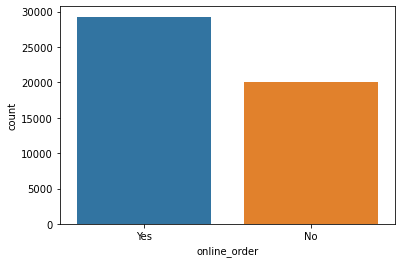

In [30]:
sns.countplot(x='online_order',data=df1)

<AxesSubplot:xlabel='book_table', ylabel='count'>

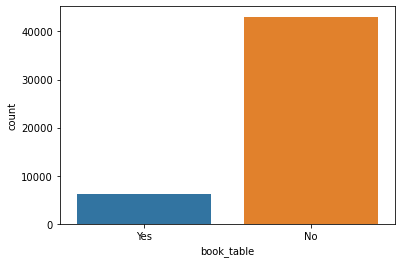

In [31]:
sns.countplot(x="book_table",data=df1)

In [32]:
df1['ratings'] = df1['ratings'].apply(lambda x: float(x.split()[0].replace('N/A','0')))
df1.ratings.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: ratings, dtype: float64

In [33]:
df1.loc[df1['ratings']==0].head()

,rest_name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost-for-2,type,city
82,Chill Out,No,No,0.0,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery,Banashankari
88,Me And My Cake,No,No,0.0,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery,Banashankari
89,Sunsadm,No,No,0.0,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari
90,Annapooraneshwari Mess,No,No,0.0,0,Banashankari,Mess,South Indian,200,Delivery,Banashankari
105,Coffee Shopee,No,No,0.0,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery,Banashankari


In [34]:
x = df1.groupby("book_table").agg({'ratings':'mean'})

<AxesSubplot:xlabel='book_table'>

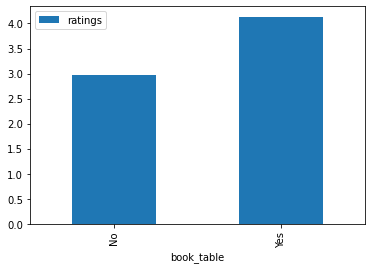

In [35]:
x.plot(kind = 'bar', use_index=True)

From this plot we understand that the restaurants which have table booking available, have higher ratings

<AxesSubplot:xlabel='count', ylabel='location'>

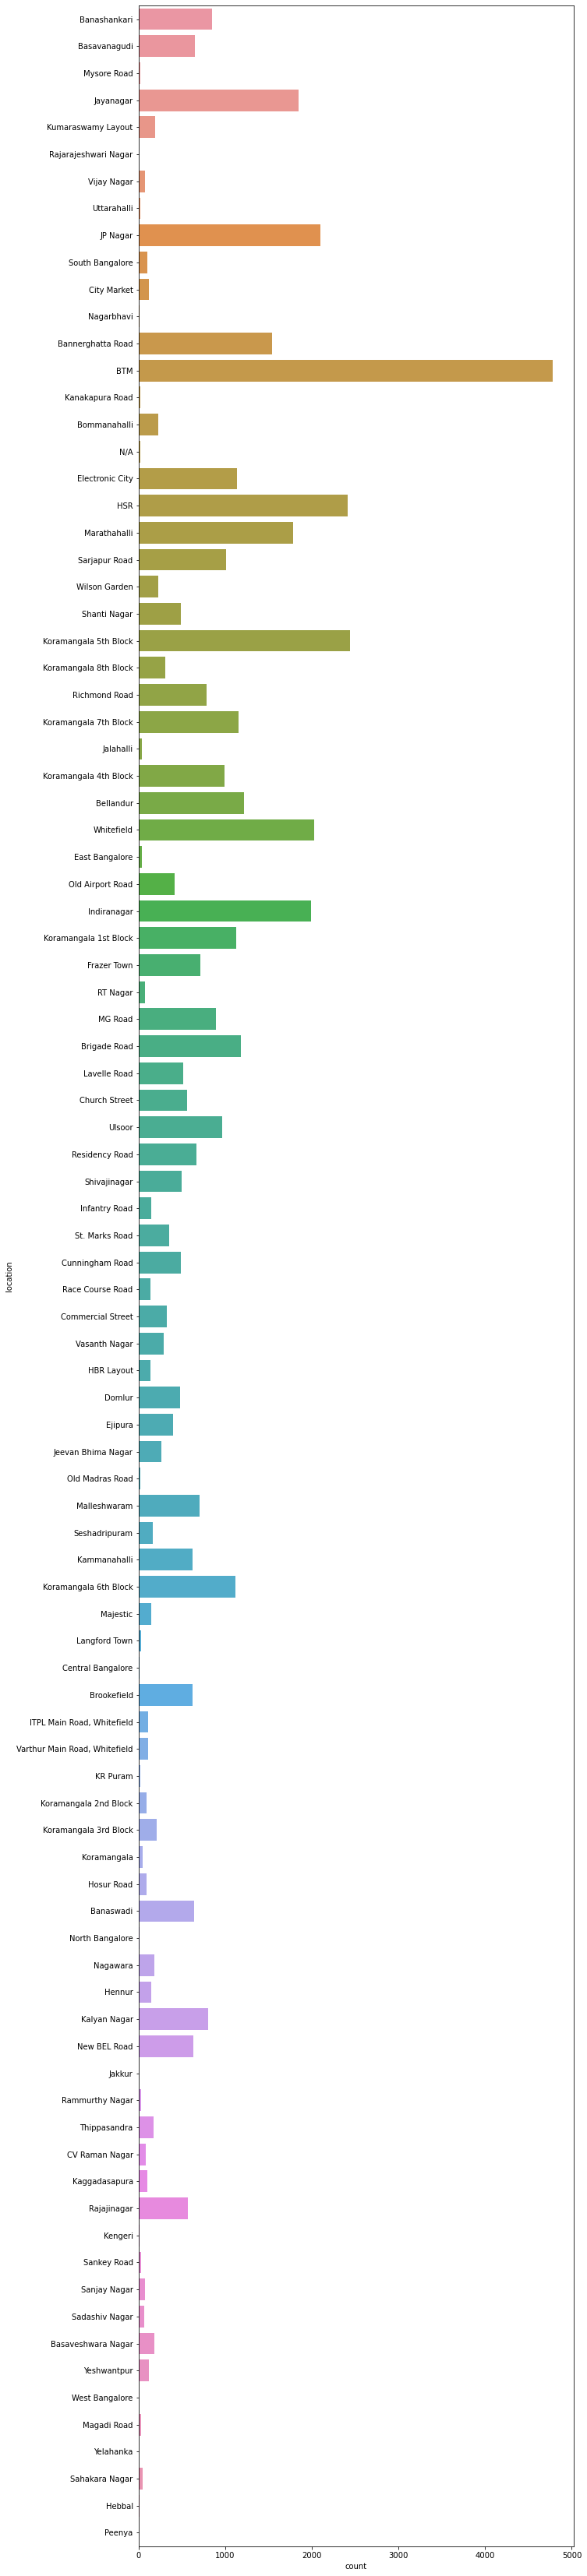

In [36]:
fig = plt.figure(figsize=(10,60))

sns.countplot(y=df1.location)

This plot shows that BMT is the best location for having food

In [37]:
x = df1.groupby('location').agg({'votes':'mean'})
x

,votes
location,
BTM,129.467894
Banashankari,192.158580
Banaswadi,55.604687
Bannerghatta Road,142.337232
Basavanagudi,145.804916
...,...
West Bangalore,277.500000
Whitefield,229.851797
Wilson Garden,31.917391


<AxesSubplot:ylabel='location'>

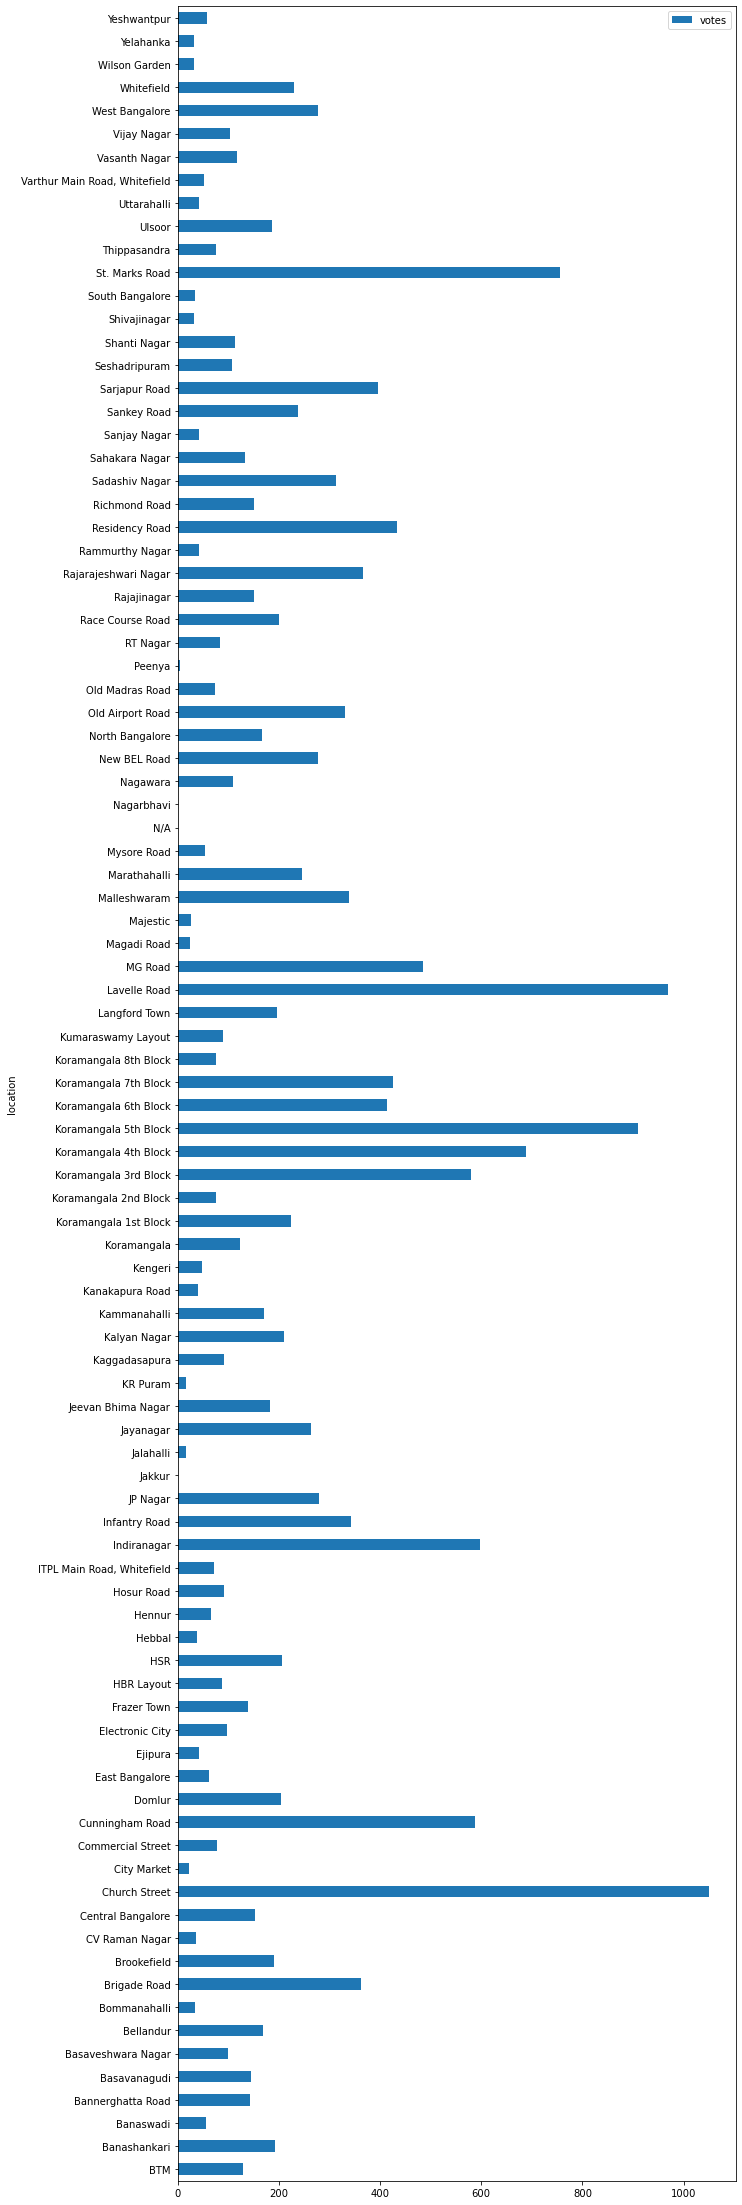

In [38]:
x.plot(kind='barh', use_index=True, figsize=(10,40))

In [39]:
x = df1.groupby('location').agg({'ratings':'mean'})
x

,ratings
location,
BTM,2.933257
Banashankari,3.213609
Banaswadi,2.597500
Bannerghatta Road,2.809942
Basavanagudi,3.355300
...,...
West Bangalore,2.525000
Whitefield,2.820975
Wilson Garden,2.875217


<AxesSubplot:ylabel='location'>

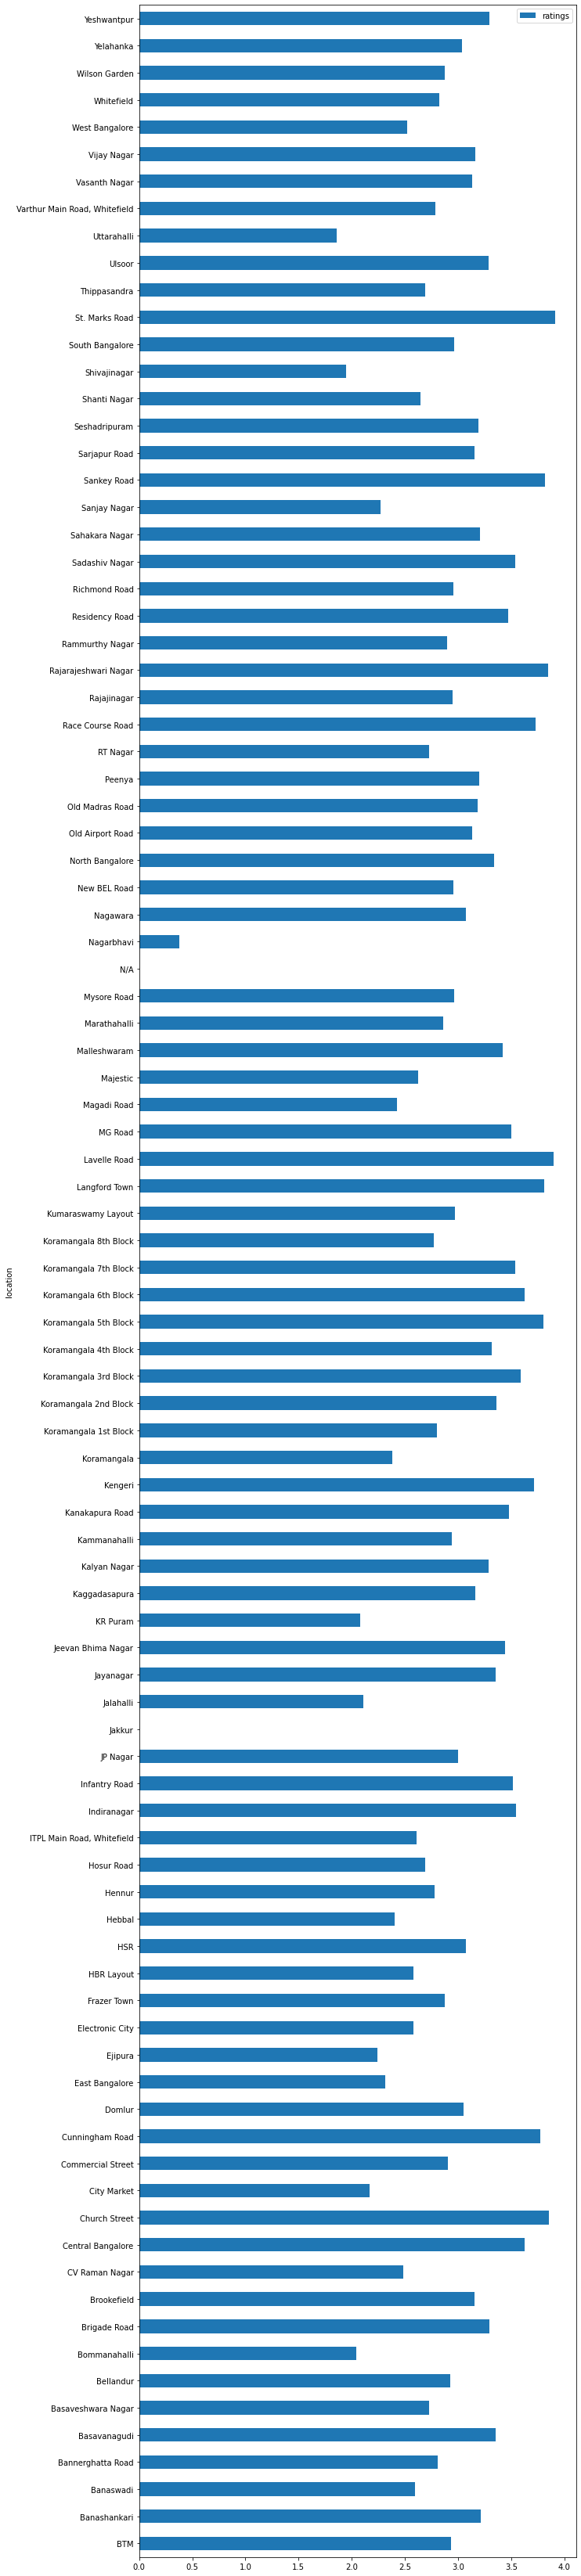

In [40]:
x.plot(kind='barh', use_index=True, figsize=(10,60))

<AxesSubplot:xlabel='count', ylabel='rest_type'>

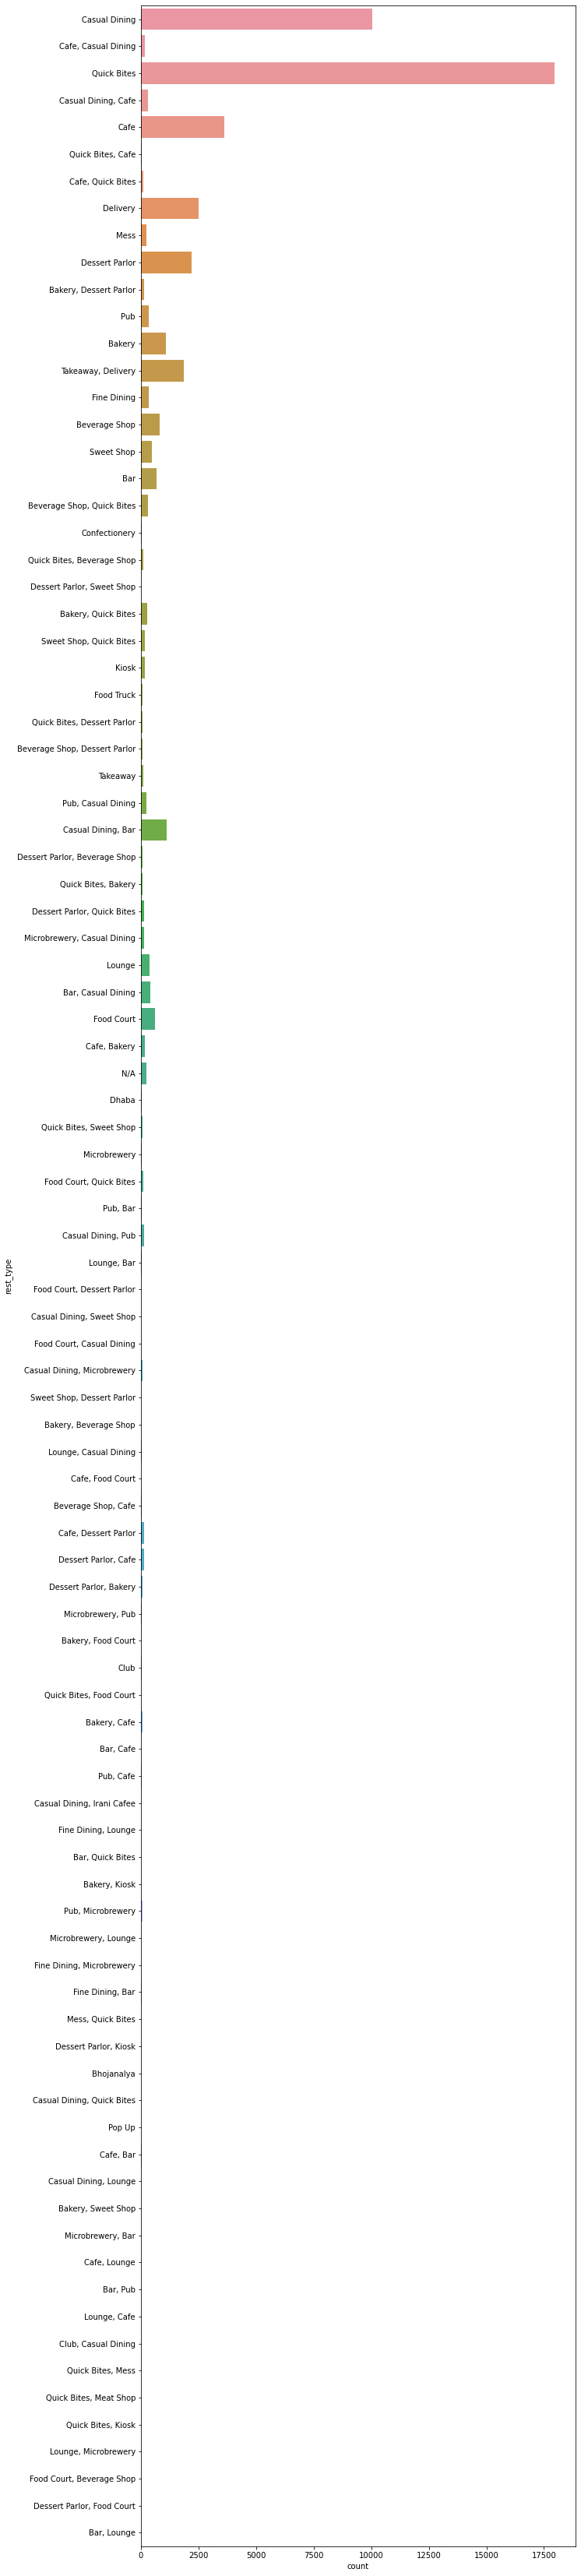

In [41]:
fig = plt.figure(figsize=(10,60))
sns.countplot(y=df1.rest_type)

In [42]:
x = df1.groupby('rest_type').agg({'ratings':'max'})
x

,ratings
rest_type,
Bakery,4.8
"Bakery, Beverage Shop",3.2
"Bakery, Cafe",4.4
"Bakery, Dessert Parlor",4.3
"Bakery, Food Court",3.2
...,...
Sweet Shop,4.4
"Sweet Shop, Dessert Parlor",0.0
"Sweet Shop, Quick Bites",4.3


<AxesSubplot:ylabel='Density'>

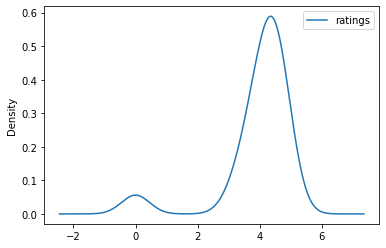

In [43]:
x.plot(kind='kde',use_index=True)

This plot tells you that most rest_type are rated near 4.

<AxesSubplot:xlabel='type', ylabel='count'>

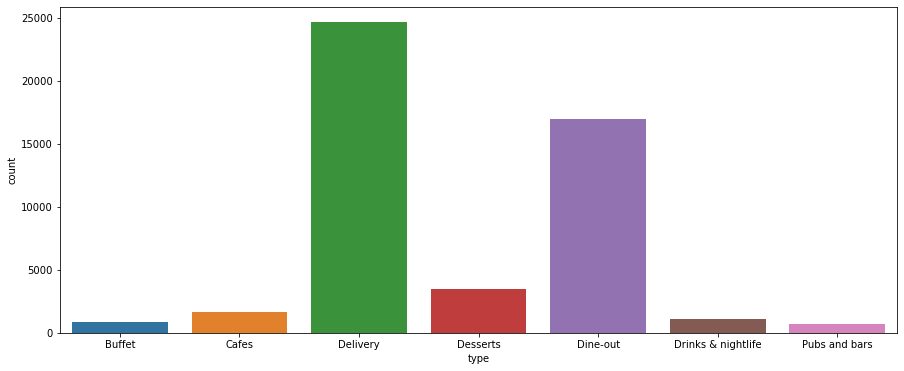

In [44]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x=df1.type)

Delivery and dine-in types are the more in number

In [45]:
x = df1.groupby('type').agg({'ratings':'mean'})
x

,ratings
type,
Buffet,3.940139
Cafes,3.592340
Delivery,3.051642
Desserts,2.988358
Dine-out,3.074098
Drinks & nightlife,3.946717
Pubs and bars,3.852102


<AxesSubplot:xlabel='type', ylabel='ratings'>

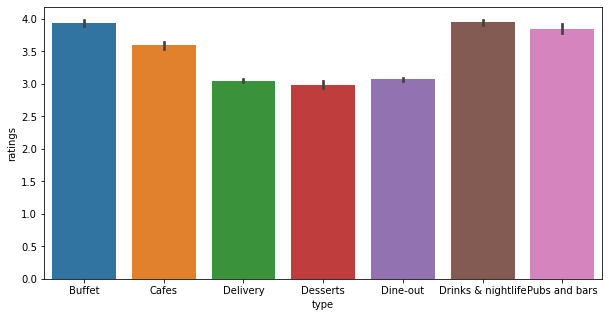

In [46]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df1.type,y=df1.ratings)

In [47]:
df1['cost-for-2'] = df1['cost-for-2'].apply(lambda x:float(x.split()[0].replace('N/A','0')))
df1['cost-for-2'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost-for-2, dtype: float64

In [48]:
x = df1.groupby('rest_name')['cost-for-2'].mean().sort_values()
x = x.tail(10)

<BarContainer object of 10 artists>

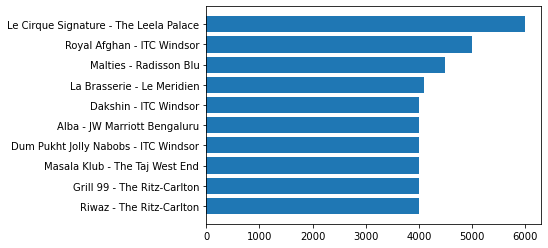

In [49]:
plt.barh(y=x.index, width=x.values)

Le Cirque Signature - The Leela Palace is the most expensive restaurant in the city.

<AxesSubplot:xlabel='count', ylabel='cost-for-2'>

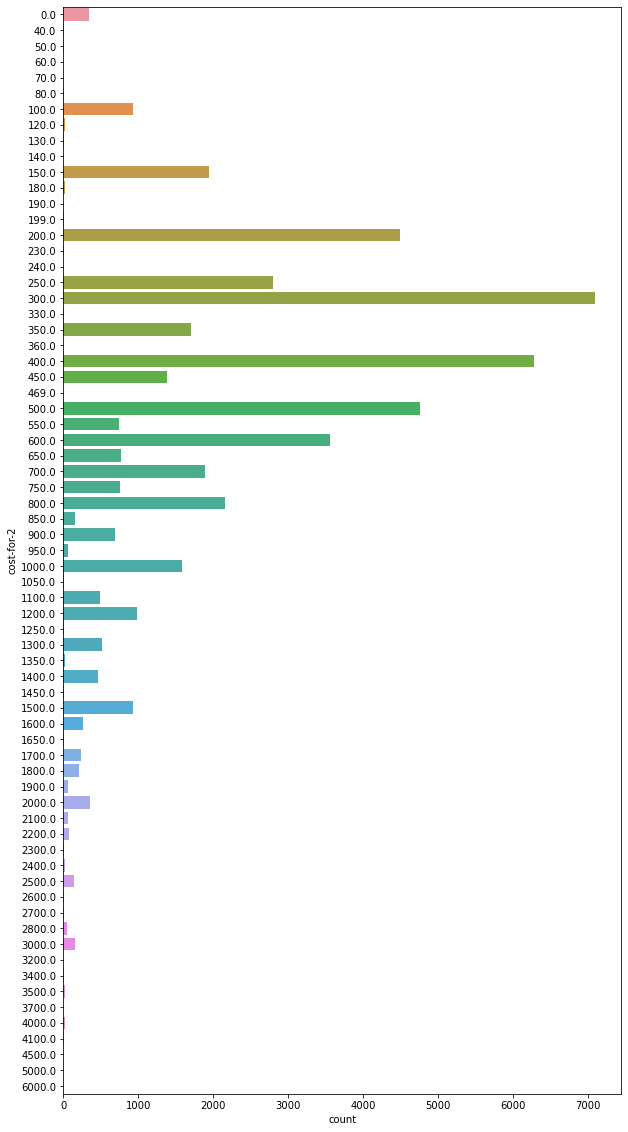

In [50]:
fig = plt.figure(figsize=(10,20))
sns.countplot(y=df1['cost-for-2'])

300 bucks is the aggregated cost for 2 people in a restaurant.